# Tampa modeling residuals w/grouped features after VIF analysis

In [139]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="groovy-groove-309018-3049c669c548.json"
client = bigquery.Client()

import seaborn as sns

### Predictors

In [140]:
tampa_zip = ['33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576']

In [141]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [142]:
%%bigquery acs_tampa1
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');


Downloading: 100%|██████████| 250/250 [00:01<00:00, 135.13rows/s]


In [143]:
%%bigquery acs_tampa2
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
UNION ALL
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');

Executing query with job ID: 877bb87c-fb3e-42e8-b01d-abc610320a8c
Query executing: 1.42s

Could not save output to variable 'acs_tampa2'.

ERROR:
 HTTPSConnectionPool(host='bigquery.googleapis.com', port=443): Read timed out.


In [144]:
%%bigquery acs_tampa3
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');


Executing query with job ID: e8614611-a632-48c4-b605-621b57bbf89f
Query executing: 1.44s

Could not save output to variable 'acs_tampa3'.

ERROR:
 HTTPSConnectionPool(host='bigquery.googleapis.com', port=443): Read timed out.


In [145]:
%%bigquery acs_tampa4
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
;

Downloading: 100%|██████████| 125/125 [00:02<00:00, 61.79rows/s]


In [146]:
%%bigquery acs_tampa5

SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576')
;

Downloading: 100%|██████████| 125/125 [00:02<00:00, 61.11rows/s]


In [147]:
%%bigquery acs_tampa6
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('33647','33511','33578','34668','34698','33614','34655','33615','33617','33612',
             '34667','34609','33610','33624','33771','33573','33611','33702','34653','33604',
             '33613','33707','33710','33756','33764','34683','33619','33713','34684','33709',
             '33705','34608','34652','33770','34689','34606','33594','33579','33542','33626',
             '33618','33543','33772','33781','33541','33701','33703','33607','33712','33510',
             '33570','33755','34691','33625','33629','34639','33556','33563','34677','33706',
             '33763','33708','33596','33558','34601','34638','34654','33716','33584','33547',
             '33782','33602','33544','34613','33569','33606','33572','33774','33761','33714',
             '33759','33609','33773','34695','33603','33711','33634','33598','33760','33704',
             '33566','33767','34685','33635','33525','33777','33637','33778','33605','33545',
             '33616','33565','33549','33523','33559','33765','33715','33534','34669','34610',
             '33527','33776','33540','33592','34607','34688','33785','33567','33597','33548',
             '34602','33762','34614','34637','33576');

Downloading: 100%|██████████| 125/125 [00:02<00:00, 59.37rows/s]


In [148]:
acs_cols1=acs_tampa1.columns
acs_cols2=acs_tampa2.columns
acs_cols3=acs_tampa3.columns
acs_cols4=acs_tampa4.columns
acs_cols5=acs_tampa5.columns
acs_cols6=acs_tampa6.columns

common_columns=list((((((set(acs_cols1).intersection
                        (set(acs_cols2))).intersection
                        (set(acs_cols3))).intersection
                        (set(acs_cols4))).intersection
                        (set(acs_cols5))).intersection
                        (set(acs_cols6))))

In [149]:
dfs=[acs_tampa1[common_columns],
    acs_tampa2[common_columns],
    acs_tampa3[common_columns],
    acs_tampa4[common_columns],
    acs_tampa5[common_columns],
    acs_tampa6[common_columns]]

acs_all_tampa=pd.concat(dfs)
acs_all_tampa.shape

(664, 234)

In [150]:
acs_all_tampa['do_date'] = acs_all_tampa['do_date'].astype(str)
acs_all_tampa['year'] = np.where(acs_all_tampa['do_date'] =='20072011', '2011',
                                  np.where(acs_all_tampa['do_date'] =='20082012','2012',
                                  np.where(acs_all_tampa['do_date'] =='20092013','2013',
                                  np.where(acs_all_tampa['do_date'] =='20102014','2014',
                                  np.where(acs_all_tampa['do_date'] =='20112015','2015',
                                  np.where(acs_all_tampa['do_date'] =='20122016','2016',
                                  np.where(acs_all_tampa['do_date'] =='20132017','2017',
                                  np.where(acs_all_tampa['do_date'] =='2014-01-01','2018',
                                           None))))))))

In [152]:
acs_all_tampa['year'] = acs_all_tampa['year'].astype('string')


In [153]:
acs_all_tampa.head()

,median_rent,vacant_housing_units,one_parent_families_with_young_children,one_year_more_college,female_female_households,families_with_young_children,sales_office_employed,rent_20_to_25_percent,male_45_64_grade_9_12,male_45_64_some_college,male_80_to_84,dwellings_50_or_more_units,less_one_year_college,income_less_10000,owner_occupied_housing_units,owner_occupied_housing_units_median_value,black_male_55_64,occupation_natural_resources_construction_maintenance,male_25_to_29,female_10_to_14,two_or_more_races_pop,income_200000_or_more,occupation_production_transportation_material,male_85_and_over,less_than_high_school_graduate,vacant_housing_units_for_rent,dwellings_3_to_4_units,other_race_pop,female_40_to_44,income_20000_24999,male_10_to_14,income_45000_49999,male_20,income_50000_59999,pop_in_labor_force,in_grades_1_to_4,married_households,income_150000_199999,median_year_structure_built,one_car,million_dollar_housing_units,male_under_5,population_3_years_over,housing_built_1939_or_earlier,commute_60_more_mins,female_60_to_61,father_in_labor_force_one_parent_families_with_young_children,high_school_diploma,two_parents_mother_in_labor_force_families_with_young_children,employed_other_services_not_public_admin,male_65_to_66,pop_16_over,speak_spanish_at_home,male_67_to_69,employed_arts_entertainment_recreation_accommodation_food,employed_education_health_social,male_30_to_34,commute_less_10_mins,population_1_year_and_over,male_35_to_39,female_15_to_17,income_60000_74999,poverty,female_18_to_19,employed_information,female_30_to_34,housing_built_2005_or_later,geo_id,occupation_services,four_more_cars,commute_25_29_mins,two_parents_father_in_labor_force_families_with_young_children,male_50_to_54,female_80_to_84,amerindian_pop,female_85_and_over,workers_16_and_over,commute_10_14_mins,rent_35_to_40_percent,high_school_including_ged,in_school,median_age,rent_25_to_30_percent,some_college_and_associates_degree,pop_25_64,income_10000_14999,nonfamily_households,commuters_by_subway_or_elevated,male_45_64_bachelors_degree,owner_occupied_housing_units_lower_value_quartile,mobile_homes,different_house_year_ago_different_city,white_pop,not_hispanic_pop,income_40000_44999,dwellings_10_to_19_units,dwellings_2_units,in_grades_9_to_12,children,civilian_labor_force,hispanic_male_55_64,owner_occupied_housing_units_upper_value_quartile,mortgaged_housing_units,asian_male_55_64,not_us_citizen_pop,associates_degree,renter_occupied_housing_units_paying_cash_median_gross_rent,female_62_to_64,male_15_to_17,male_40_to_44,pop_5_years_over,female_67_to_69,employed_agriculture_forestry_fishing_hunting_mining,female_under_5,income_15000_19999,vacant_housing_units_for_sale,family_households,households_public_asst_or_food_stamps,children_in_single_female_hh,percent_income_spent_on_rent,rent_burden_not_computed,worked_at_home,black_male_45_54,management_business_sci_arts_employed,asian_male_45_54,male_5_to_9,hispanic_pop,male_21,female_70_to_74,median_income,commuters_drove_alone,male_55_to_59,speak_only_english_at_home,rent_under_10_percent,commuters_16_over,pop_determined_poverty_status,rent_10_to_15_percent,commuters_by_car_truck_van,female_35_to_39,female_25_to_29,bachelors_degree,in_undergrad_college,rent_40_to_50_percent,commuters_by_public_transportation,two_parents_in_labor_force_families_with_young_children,commute_35_44_mins,female_22_to_24,rent_over_50_percent,female_pop,employed_construction,female_75_to_79,masters_degree,different_house_year_ago_same_city,male_male_households,two_parent_families_with_young_children,no_car,commuters_by_bus,male_45_64_associates_degree,asian_pop,income_per_capita,in_grades_5_to_8,graduate_professional_degree,female_50_to_54,two_cars,male_45_64_graduate_degree,female_21,father_one_parent_families_with_young_children,male_pop,no_cars,income_35000_39999,walked_to_work,commuters_by_carpool,not_in_labor_force,income_125000_149999,occupied_housing_units,male_45_64_high_school,pop_25_years_over,employed_finance_insurance_real_est

In [154]:
missing_zip = [el for el in tampa_zip if el not in list(acs_all_tampa['geo_id'])]
missing_zip

[]

#### Grouping female age columns together

In [155]:
female_under_18 = acs_all_tampa.female_under_5 + acs_all_tampa.female_5_to_9 + acs_all_tampa.female_10_to_14 + acs_all_tampa.female_15_to_17 + acs_all_tampa.female_18_to_19
female_under_60 = acs_all_tampa.female_20 + acs_all_tampa.female_21 + acs_all_tampa.female_22_to_24 + acs_all_tampa.female_25_to_29 + acs_all_tampa.female_30_to_34 + acs_all_tampa.female_35_to_39 + acs_all_tampa.female_40_to_44 + acs_all_tampa.female_45_to_49 + acs_all_tampa.female_50_to_54 + acs_all_tampa.female_55_to_59 
female_over_60 = acs_all_tampa.female_60_to_61 + acs_all_tampa.female_62_to_64 + acs_all_tampa.female_65_to_66 + acs_all_tampa.female_67_to_69 + acs_all_tampa.female_70_to_74 + acs_all_tampa.female_75_to_79 + acs_all_tampa.female_80_to_84 + acs_all_tampa.female_85_and_over

In [156]:
female_under_18 = female_under_18.astype(float)
female_under_60 = female_under_60.astype(float)
female_over_60 = female_over_60.astype(float)

#### Grouping male age columns together

In [157]:
male_under_18 = acs_all_tampa.male_under_5 + acs_all_tampa.male_5_to_9 + acs_all_tampa.male_10_to_14 + acs_all_tampa.male_15_to_17 + acs_all_tampa.male_18_to_19
male_under_60 = acs_all_tampa.male_20 + acs_all_tampa.male_21 + acs_all_tampa.male_22_to_24 + acs_all_tampa.male_25_to_29 + acs_all_tampa.male_30_to_34 + acs_all_tampa.male_35_to_39 + acs_all_tampa.male_40_to_44 + acs_all_tampa.male_45_to_49 + acs_all_tampa.male_50_to_54 + acs_all_tampa.male_55_to_59 
male_over_60 =  acs_all_tampa.male_65_to_66 + acs_all_tampa.male_67_to_69 + acs_all_tampa.male_70_to_74 + acs_all_tampa.male_75_to_79 + acs_all_tampa.male_80_to_84 + acs_all_tampa.male_85_and_over

In [158]:
male_under_18 = male_under_18.astype(float)
male_under_60 = male_under_60.astype(float)
male_over_60 = male_over_60.astype(float)

#### Grouping age columns together

In [457]:
age_under_18 = female_under_18.astype(float)+male_under_18.astype(float)
age_18to60 = female_under_60.astype(float)+male_under_60.astype(float)
age_over_60 = female_over_60.astype(float)+male_over_60.astype(float)

#### Grouping by gender

In [458]:
females = female_under_18.astype(float
        )+female_under_60.astype(float
        )+female_over_60.astype(float)

#### Grouping rent affordability columns together

In [159]:
under10 = acs_all_tampa.rent_under_10_percent
tento50 = acs_all_tampa.rent_40_to_50_percent + acs_all_tampa.rent_35_to_40_percent + acs_all_tampa.rent_30_to_35_percent+ acs_all_tampa.rent_25_to_30_percent + acs_all_tampa.rent_20_to_25_percent + acs_all_tampa.rent_15_to_20_percent + acs_all_tampa.rent_10_to_15_percent
over50 = acs_all_tampa.rent_over_50_percent
uncomputed = acs_all_tampa.rent_burden_not_computed

In [160]:
rent_under10 = under10.astype(float)
rent_tento50 = tento50.astype(float)
rent_over50 = over50.astype(float)
rent_uncomputed = uncomputed.astype(float)

#### Grouping dwellings columns together

In [161]:
small_dwellings = acs_all_tampa.dwellings_1_units_attached + acs_all_tampa.dwellings_1_units_detached + acs_all_tampa.dwellings_2_units + acs_all_tampa.dwellings_3_to_4_units + acs_all_tampa.dwellings_5_to_9_units
large_dwellings = acs_all_tampa.dwellings_10_to_19_units + acs_all_tampa.dwellings_20_to_49_units + acs_all_tampa.dwellings_50_or_more_units

In [162]:
small_dwellings = small_dwellings.astype(float)
large_dwellings = large_dwellings.astype(float)

#### Grouping commute time together

In [163]:
commute_less_than_30 =  acs_all_tampa.commute_less_10_mins + acs_all_tampa.commute_10_14_mins + acs_all_tampa.commute_15_19_mins + acs_all_tampa.commute_20_24_mins + acs_all_tampa.commute_25_29_mins
commute_less_than_60 = acs_all_tampa.commute_30_34_mins + acs_all_tampa.commute_35_44_mins +  acs_all_tampa.commute_45_59_mins
commute_over_60 =  acs_all_tampa.commute_60_more_mins 

In [164]:
commute_less_than_30 = commute_less_than_30.astype(float)
commute_less_than_60 = commute_less_than_60.astype(float)
commute_over_60 = commute_over_60.astype(float)

#### Grouping income levels together

In [165]:
income_less_than_60000 = acs_all_tampa.income_less_10000 + acs_all_tampa.income_10000_14999 + acs_all_tampa.income_15000_19999 + acs_all_tampa.income_20000_24999 + acs_all_tampa.income_25000_29999 + acs_all_tampa.income_30000_34999 + acs_all_tampa.income_35000_39999 + acs_all_tampa.income_40000_44999 + acs_all_tampa.income_45000_49999 + acs_all_tampa.income_50000_59999
income_less_than_125000 = acs_all_tampa.income_60000_74999 + acs_all_tampa.income_75000_99999 + acs_all_tampa.income_100000_124999
income_over_125000 = acs_all_tampa.income_125000_149999 + acs_all_tampa.income_150000_199999 + acs_all_tampa.income_200000_or_more

In [166]:
income_less_than_60000 = income_less_than_60000.astype(float)
income_less_than_125000 = income_less_than_125000.astype(float)
income_over_125000 = income_over_125000.astype(float)

#### Grouping employment industries together

In [167]:
employed_creative = acs_all_tampa.employed_arts_entertainment_recreation_accommodation_food
employed_prof = acs_all_tampa.employed_education_health_social + acs_all_tampa.employed_finance_insurance_real_estate + acs_all_tampa.employed_information + acs_all_tampa.employed_science_management_admin_waste
employed_skill = acs_all_tampa.employed_manufacturing + acs_all_tampa.employed_construction + acs_all_tampa.employed_agriculture_forestry_fishing_hunting_mining
employed_service = acs_all_tampa.employed_retail_trade + acs_all_tampa.employed_other_services_not_public_admin + acs_all_tampa.employed_public_administration + acs_all_tampa.employed_transportation_warehousing_utilities + acs_all_tampa.employed_wholesale_trade

#### Choosing family type columns

In [168]:
two_parent_hh = acs_all_tampa.two_parent_families_with_young_children.astype(float)
one_parent_hh = acs_all_tampa.one_parent_families_with_young_children.astype(float)

#### Choosing population columns

In [169]:
asian_pop = acs_all_tampa.asian_pop.astype(float)
black_pop = acs_all_tampa.black_pop.astype(float)
hispanic_pop = acs_all_tampa.hispanic_pop.astype(float)
white_pop = acs_all_tampa.white_pop.astype(float)
amerindian_pop = acs_all_tampa.amerindian_pop.astype(float)
other_race_pop = acs_all_tampa.other_race_pop.astype(float)
two_or_more_races_pop = acs_all_tampa.other_race_pop.astype(float)
not_hispanic_pop = acs_all_tampa.not_hispanic_pop.astype(float)
not_us_citizen_pop = acs_all_tampa.not_us_citizen_pop.astype(float)
total_pop = acs_all_tampa.total_pop.astype(float)

In [170]:
pop_columns = [asian_pop, amerindian_pop, black_pop, hispanic_pop, white_pop,other_race_pop,two_or_more_races_pop]

In [171]:
print(asian_pop.sum()+amerindian_pop.sum()+black_pop.sum()+hispanic_pop.sum()+white_pop.sum()+other_race_pop.sum()+two_or_more_races_pop.sum())
print(total_pop.sum())
print(not_hispanic_pop.sum()+hispanic_pop.sum())

15196969.0
15462882.0
15462882.0


#### Grouping education level columns together

In [172]:
college_educated = acs_all_tampa.in_undergrad_college + acs_all_tampa.some_college_and_associates_degree + acs_all_tampa.associates_degree + acs_all_tampa.bachelors_degree + acs_all_tampa.bachelors_degree_2 +acs_all_tampa.bachelors_degree_or_higher_25_64 + acs_all_tampa.masters_degree + acs_all_tampa.graduate_professional_degree + acs_all_tampa.one_year_more_college     
in_school = acs_all_tampa.in_grades_1_to_4 + acs_all_tampa.in_grades_5_to_8 + acs_all_tampa.in_grades_9_to_12
inschoolcheck = acs_all_tampa.in_school
less_than_college_educated = acs_all_tampa.less_one_year_college + + acs_all_tampa.less_one_year_college
high_school_educated = acs_all_tampa.high_school_diploma + acs_all_tampa.high_school_including_ged

In [173]:
college_educated = college_educated.astype(float)
in_school = in_school.astype(float)
inschoolcheck = inschoolcheck.astype(float) 
less_than_college_educated = less_than_college_educated.astype(float)
high_school_educated = high_school_educated.astype(float)

In [174]:
print(in_school.sum())
print(inschoolcheck.sum())

2186520.0
3589797.0


#### Grouping commute type columns together

In [175]:
public_commute = acs_all_tampa.commuters_by_public_transportation + acs_all_tampa.commuters_by_subway_or_elevated + acs_all_tampa.commuters_by_bus
personal_commute = acs_all_tampa.commuters_by_car_truck_van + acs_all_tampa.commuters_by_carpool + acs_all_tampa.commuters_drove_alone

In [176]:
public_commute = public_commute.astype(float)
personal_commute = personal_commute.astype(float)

#### Choosing housing units columns

In [177]:
vacant_housing_units = acs_all_tampa.vacant_housing_units.astype(float)
vacant_housing_units_for_rent = acs_all_tampa.vacant_housing_units_for_rent.astype(float)
vacant_housing_units_for_sale = acs_all_tampa.vacant_housing_units_for_sale.astype(float)

In [178]:
print(vacant_housing_units.sum())
print(vacant_housing_units_for_rent.sum()+vacant_housing_units_for_sale.sum())

1147538.0
330773.0


#### Choosing owner occuppied housing units

In [179]:
owner_occupied_housing_units = acs_all_tampa.owner_occupied_housing_units.astype(float)
owner_occupied_housing_units_lower_value_quartile = acs_all_tampa.owner_occupied_housing_units_lower_value_quartile.astype(float)
owner_occupied_housing_units_median_value = acs_all_tampa.owner_occupied_housing_units_median_value.astype(float)
owner_occupied_housing_units_upper_value_quartile = acs_all_tampa.owner_occupied_housing_units_upper_value_quartile.astype(float)

#### Choosing employment information

In [180]:
unemployed_pop = acs_all_tampa.unemployed_pop.astype(float)
employed_pop = acs_all_tampa.employed_pop.astype(float)

#### Choosing family information

In [181]:
family_households = acs_all_tampa.family_households.astype(float)
nonfamily_households = acs_all_tampa.nonfamily_households.astype(float)

#### Choosing remaining miscelleanous columns

In [182]:
Year = acs_all_tampa.year.astype(int)
geo_id = acs_all_tampa.geo_id.astype(int)
gini_index = acs_all_tampa.gini_index.astype(float)
income_per_capita = acs_all_tampa.income_per_capita.astype(float)
median_age = acs_all_tampa.median_age.astype(float)
median_income = acs_all_tampa.median_income.astype(float)
married_households = acs_all_tampa.married_households.astype(float)

#### Building the final dataframe for ACS features before combining with ZRI information

In [459]:
dict ={'Year': Year, 'geo_id': geo_id,'gini_index':gini_index,
        'income_per_capita':income_per_capita,'median_age':median_age,
        'median_income':median_income,'family_households':family_households,
        'nonfamily_households':nonfamily_households,
        'unemployed_pop':unemployed_pop, 'employed_pop':employed_pop, 
        'owner_occupied_housing_units':owner_occupied_housing_units,
        'owner_occupied_housing_units_upper_value_quartile':owner_occupied_housing_units_upper_value_quartile,
        'vacant_housing_units':vacant_housing_units,
        'vacant_housing_units_for_rent':vacant_housing_units_for_rent,
        'vacant_housing_units_for_sale':vacant_housing_units_for_sale,
        'public_commute':public_commute,'personal_commute':personal_commute,
        'college_educated':college_educated, 'in_school':in_school,
        'high_school_educated':high_school_educated,'asian_pop':asian_pop,
        'amerindian_pop':amerindian_pop, 'black_pop':black_pop,
        'hispanic_pop':hispanic_pop,'white_pop':white_pop,
        'other_race_pop':other_race_pop,'two_or_more_races_pop':two_or_more_races_pop,
        'two_parent_hh':two_parent_hh,'one_parent_hh':one_parent_hh,
        'employed_creative':employed_creative, 'employed_prof':employed_prof,
        'employed_skill':employed_skill, 'employed_service':employed_service,
        'income_less_than_60000':income_less_than_60000,
        'income_less_than_125000':income_less_than_125000,
        'income_over_125000':income_over_125000,
        'commute_less_than_30':commute_less_than_30,
        'commute_less_than_60':commute_less_than_60,
        'commute_over_60':commute_over_60, 'small_dwellings':small_dwellings,
        'large_dwellings':large_dwellings,'rent_under10':rent_under10,
        'rent_tento50':rent_tento50, 'rent_over50':rent_over50,
        'rent_uncomputed':rent_uncomputed,'females':females,
        'age_under_18':age_under_18,'age_18to60':age_18to60,
        'age_over_60':age_over_60}

In [491]:
acs_final = pd.DataFrame(dict)

In [461]:
acs_final.shape

(664, 49)

In [462]:
acs_final.head()

,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60
0,2012,33597,0.4179,18242.0,44.5,34381.0,2207.0,897.0,588.0,2871.0,2490.0,152500.0,1032.0,65.0,48.0,12.0,4908.0,3807.0,1071.0,4464.0,33.0,2.0,675.0,565.0,6722.0,0.0,0.0,514.0,129.0,540,762,602,967,2226.0,761.0,117.0,1280.0,838.0,522.0,2048.0,30.0,3.0,390.0,103.0,118.0,4089.0,1846.0,3912.0,1990.0
1,2012,34639,0.3541,27500.0,40.1,63250.0,6561.0,1745.0,1011.0,11801.0,7041.0,270400.0,722.0,135.0,180.0,82.0,21052.0,25849.0,4841.0,7671.0,651.0,0.0,953.0,4182.0,17720.0,0.0,0.0,1132.0,307.0,1222,5570,1412,3597,3925.0,3074.0,1307.0,4824.0,5182.0,782.0,8468.0,265.0,0.0,1012.0,173.0,80.0,12697.0,6895.0,13074.0,3566.0
2,2012,33572,0.4396,37636.0,42.6,66444.0,4209.0,1515.0,800.0,6887.0,4516.0,362700.0,1167.0,151.0,372.0,146.0,12700.0,16201.0,2005.0,4801.0,302.0,14.0,557.0,1661.0,11957.0,38.0,38.0,654.0,273.0,433,3342,925,2187,2627.0,1868.0,1229.0,3165.0,2705.0,646.0,6340.0,88.0,31.0,799.0,248.0,130.0,7115.0,3329.0,8053.0,2572.0
3,2012,33606,0.5410,44828.0,30.1,61629.0,3032.0,4360.0,604.0,9146.0,3152.0,660800.0,1121.0,191.0,183.0,268.0,14298.0,25978.0,1483.0,2182.0,533.0,13.0,1292.0,1908.0,13015.0,92.0,92.0,635.0,238.0,1223,5199,675,2049,3595.0,2136.0,1661.0,6979.0,1198.0,245.0,5882.0,2574.0,31.0,3054.0,845.0,310.0,8303.0,4299.0,10457.0,1985.0
4,2012,33545,0.3194,22566.0,31.5,65878.0,3163.0,848.0,784.0,5884.0,3158.0,203000.0,917.0,210.0,189.0,22.0,11076.0,11549.0,2394.0,4278.0,276.0,138.0,1797.0,2338.0,7404.0,55.0,55.0,997.0,262.0,586,2890,430,1978,1843.0,1862.0,306.0,2373.0,2749.0,569.0,4058.0,261.0,14.0,693.0,102.0,44.0,6306.0,3873.0,6959.0,1140.0


In [492]:
acs_final['geo_id']= acs_final['geo_id'].astype('string')
acs_final['Year']= acs_final['Year'].astype('string')

## Label

This time keep the data into a monthly granularity

In [ ]:
zri_all = pd.read_csv('./data/Zip_Zri_AllHomesPlusMultifamily.csv')

In [261]:
zri_tampa = zri_all[zri_all['RegionName'].isin(tampa_zip)]
zri_tampa.shape

(125, 120)

In [262]:
valueCols=[col for col in zri_tampa.columns if '20' in col] #columns with the indices
indexCols=[col for col in zri_tampa.columns if '20' not in col] #columns without the indices
zri_long=pd.melt(zri_tampa, id_vars=indexCols,value_vars=valueCols, var_name="year_month",
                 value_name="zri")
zri_long['year_month'] = pd.to_datetime(zri_long['year_month'])
zri_long['year'] = zri_long['year_month'].dt.year
zri_long['year'] = zri_long['year'].astype('string')
zri_long['month'] = zri_long['year_month'].dt.month
zri_long['month'] = zri_long['month'].astype('string')
zri_long['RegionName'] = zri_long['RegionName'].astype('string')
zri_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month
0,72737,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,163,2010-09-01,1113.0,2010,9
1,72653,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,460,2010-09-01,932.0,2010,9
2,399576,33578,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,490,2010-09-01,953.0,2010,9
3,73162,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,598,2010-09-01,876.0,2010,9
4,73181,34698,Dunedin,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,668,2010-09-01,1138.0,2010,9


In [493]:
full_df = pd.merge(zri_long, acs_final, how = 'left', left_on = ['RegionName', 'year'], 
                  right_on = ['geo_id', 'Year' ])
full_df.shape

(14125, 60)

In [494]:
full_df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60
7128,73162,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,598,2015-06-01,985.0,2015,6,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13501,72653,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,460,2019-09-01,1322.0,2019,9,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5463,72801,33760,South Highpoint,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,5975,2014-04-01,1111.0,2014,4,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5100,72719,33616,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,6436,2014-01-01,1286.0,2014,1,2014,33616,0.4937,31436.0,34.0,48595.0,3118.0,2644.0,738.0,6929.0,2459.0,200400.0,724.0,275.0,51.0,268.0,12724.0,13176.0,2009.0,5234.0,805.0,48.0,2599.0,1880.0,7772.0,15.0,15.0,399.0,583.0,713,2978,660,2578,3483.0,1594.0,685.0,5014.0,1693.0,227.0,4485.0,1973.0,123.0,2212.0,772.0,196.0,6974.0,3295.0,8572.0,1432.0
6459,72706,33603,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,5648,2014-12-01,1103.0,2014,12,2014,33603,0.4726,21215.0,36.9,34580.0,4334.0,3839.0,1184.0,9760.0,4400.0,168600.0,1070.0,305.0,204.0,922.0,16800.0,17249.0,2477.0,8109.0,105.0,9.0,4521.0,7036.0,8026.0,68.0,68.0,607.0,882.0,1250,4545,1259,2706,5803.0,1926.0,444.0,6593.0,2243.0,358.0,7937.0,1141.0,21.0,2299.0,1294.0,159.0,10013.0,4438.0,12267.0,2839.0


In [200]:
%%bigquery area_zip

SELECT  zip_code, area_land_meters, area_water_meters

FROM `bigquery-public-data.geo_us_boundaries.zip_codes`

Downloading: 100%|██████████| 33113/33113 [00:01<00:00, 18195.02rows/s]


In [495]:
cols = area_zip.columns
area_zip['zip_code'] = area_zip['zip_code'].astype('string')
full_df['RegionName'] = full_df['RegionName'].astype('string')

In [496]:
full_df = pd.merge(full_df, area_zip, how = 'left', left_on = 'RegionName',
                      right_on = 'zip_code')
full_df.sample(5)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,area_land_meters,area_water_meters
7093,72735,33635,Town 'n' Country,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,6086,2015-05-01,1249.0,2015,5,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33635,14671128.0,1324724.0
8121,72803,33762,Feather Sound,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,9665,2016-01-01,1301.0,2016,1,2016,33762,0.4408,36138.0,47.6,63102.0,1375.0,1291.0,376.0,3009.0,2004.0,301700.0,491.0,107.0,26.0,152.0,5232.0,8597.0,592.0,2679.0,598.0,6.0,572.0,699.0,5202.0,9.0,9.0,238.0,25.0,138,1994,334,543,1266.0,881.0,519.0,2190.0,539.0,124.0,1979.0,957.0,5.0,551.0,82.0,24.0,3294.0,1001.0,4396.0,1541.0,33762,18976684.0,3517712.0
12733,73163,34669,Hudson,FL,Tampa-St. Petersburg-Clearwater,Pasco County,7054,2019-02-01,1279.0,2019,2,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34669,50427246.0,1106074.0
1712,72703,33598,Wimauma,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,5823,2011-10-01,1221.0,2011,10,2011,33598,0.4444,18014.0,31.7,39861.0,2909.0,644.0,523.0,4521.0,2584.0,262200.0,707.0,157.0,147.0,252.0,8066.0,NaN,2197.0,NaN,41.0,5.0,858.0,5496.0,5071.0,24.0,24.0,621.0,606.0,294,1714,1328,1185,2306.0,1010.0,237.0,2502.0,1607.0,253.0,2556.0,28.0,34.0,595.0,307.0,33.0,5889.0,3862.0,6076.0,1339.0,33598,280291719.0,2999676.0
1017,72765,33702,Saint Petersburg,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,1974,2011-05-01,946.0,2011,5,2011,33702,0.4464,28410.0,44.3,46551.0,7261.0,5908.0,1548.0,15714.0,9264.0,235400.0,2119.0,645.0,263.0,354.0,28034.0,NaN,4414.0,NaN,1981.0,26.0,934.0,2810.0,24217.0,65.0,65.0,852.0,641.0,1628,6848,2515,4723,8249.0,3664.0,1256.0,11706.0,2958.0,292.0,9955.0,3248.0,109.0,3056.0,614.0,126.0,15589.0,6481.0,17114.0,6187.0,33702,25842565.0,7152362.0


Drop those columns that have more than 30% missing values 

In [497]:
#There are zipcodes that don't have data for speficific months in the acs dataframe. Identify
#them and drop them

many_missing_row = full_df.loc[full_df.isnull().mean(axis=1) > 0.3].index
full_df = full_df.drop(labels = many_missing_row)
full_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,area_land_meters,area_water_meters
500,72737,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,163,2011-01-01,1124.0,2011,1,2011,33647,0.4742,35820.0,30.9,71055.0,14394.0,5765.0,2564.0,28238.0,11884.0,401800.0,2753.0,343.0,338.0,344.0,49268.0,NaN,11448.0,NaN,5598.0,97.0,8442.0,10019.0,31221.0,385.0,385.0,3996.0,1155.0,2598,16990,2142,6508,8759.0,6473.0,4927.0,12347.0,10706.0,2535.0,16470.0,6376.0,115.0,5737.0,2136.0,287.0,29484.0,18028.0,34228.0,4482.0,33647,87892259.0,3882027.0
501,72653,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,460,2011-01-01,966.0,2011,1,2011,33511,0.3947,26379.0,33.7,52820.0,13078.0,6936.0,2251.0,27014.0,10965.0,245700.0,2395.0,903.0,378.0,236.0,48948.0,NaN,8133.0,NaN,1952.0,27.0,8150.0,11272.0,29420.0,173.0,173.0,2575.0,1510.0,3290,12338,3605,7781,11168.0,6692.0,2154.0,15906.0,8044.0,1441.0,15729.0,6372.0,198.0,6812.0,1772.0,267.0,27189.0,13836.0,30688.0,6431.0,33511,41183541.0,2245873.0
502,399576,33578,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,490,2011-01-01,961.0,2011,1,2011,33578,0.3681,25750.0,32.6,59266.0,8720.0,4547.0,1366.0,17402.0,8042.0,240900.0,1946.0,869.0,256.0,186.0,33404.0,NaN,5737.0,NaN,1042.0,25.0,5747.0,6775.0,19838.0,160.0,160.0,2016.0,1191.0,1210,8299,2431,5462,6689.0,5310.0,1268.0,8953.0,6787.0,1412.0,10150.0,3377.0,129.0,3538.0,1305.0,253.0,17403.0,9933.0,20344.0,3226.0,33578,55783876.0,6379867.0
503,73162,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,598,2011-01-01,897.0,2011,1,2011,34668,0.4207,18923.0,43.8,32441.0,10862.0,7782.0,2676.0,15653.0,13714.0,145000.0,4916.0,1200.0,684.0,212.0,28502.0,NaN,6050.0,NaN,459.0,19.0,1373.0,3867.0,36543.0,49.0,49.0,1549.0,1126.0,1816,6172,2224,5441,14674.0,3545.0,425.0,9323.0,3570.0,1954.0,18941.0,2030.0,84.0,2724.0,1727.0,395.0,22463.0,9930.0,20508.0,11568.0,34668,40210100.0,6745512.0
504,73181,34698,Dunedin,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,668,2011-01-01,1102.0,2011,1,2011,34698,0.4337,28737.0,50.6,48496.0,9675.0,7266.0,1737.0,17348.0,12015.0,252900.0,5144.0,784.0,373.0,424.0,30924.0,NaN,3887.0,NaN,804.0,0.0,1025.0,2312.0,33148.0,53.0,53.0,1150.0,758.0,1885,8423,2259,4781,10312.0,5242.0,1387.0,10963.0,4596.0,876.0,15290.0,4232.0,84.0,3542.0,1237.0,63.0,20694.0,6389.0,18484.0,11882.0,34698,26453993.0,13322344.0


In [498]:
missing_30perc = full_df.columns[full_df.isnull().mean() > 0.3]
full_df = full_df.drop(columns = missing_30perc)
full_df.shape
#no columns were dropped!

(7968, 63)

In [291]:
def print_missingness(dataframe):# Number of rows and columns in the dataframe 
    nulls = dataframe.isnull().sum(axis = 0)
    print(f'The number of observations is {(dataframe.shape[0])}')
    print(f'The number of variables is {(dataframe.shape[1])}')
    print('    ')

    # Total number of missing values in the training set
    print(f'The total number of missing values is {(dataframe.isna().sum().sum())}')

    # Total number of rows with missing values. 
    print(f'The number of rows with missing values is {(dataframe.shape[0] - dataframe.dropna().shape[0])}')

    print('---   ---   ---   ---   ---   ---   ---   ---   ---')
    print(nulls[nulls>1].sort_values())

In [502]:
missing_30perc = full_df.columns[full_df.isnull().mean() > 0.3]
missing_30perc
#full_df = full_df.drop(columns = missing_30perc)

Index([], dtype='object')

In [501]:
print_missingness(full_df)

The number of observations is 7968
The number of variables is 62
    
The total number of missing values is 3068
The number of rows with missing values is 1548
---   ---   ---   ---   ---   ---   ---   ---   ---
zri                       68
college_educated        1500
high_school_educated    1500
dtype: int64


### Feature engeneering 

In [499]:
full_df['water_land_ratio'] = full_df['area_water_meters']/full_df['area_land_meters']


full_df = full_df.drop( columns = [ 'area_land_meters',
                                   'area_water_meters'])

In [500]:
full_df.sample(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,year_month,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio
1854,72678,33559,Lutz,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,6915,2011-11-01,1067.0,2011,11,2011,33559,0.4758,30649.0,33.5,54727.0,3639.0,2421.0,791.0,8715.0,3942.0,248100.0,652.0,390.0,59.0,164.0,15826.0,NaN,2077.0,NaN,915.0,0.0,1320.0,3107.0,9769.0,81.0,81.0,871.0,186.0,1188,4001,864,2662,3297.0,2066.0,697.0,4839.0,2780.0,503.0,5361.0,1100.0,53.0,1258.0,728.0,79.0,7884.0,3728.0,10091.0,1323.0,33559,0.022765
10085,72774,33711,Saint Petersburg,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,5660,2017-05-01,1367.0,2017,5,2017,33711,0.5354,24379.0,37.9,38500.0,4123.0,3021.0,844.0,7887.0,4053.0,289300.0,2274.0,113.0,152.0,566.0,12808.0,17099.0,2852.0,7614.0,282.0,28.0,10686.0,1027.0,6958.0,6.0,6.0,246.0,987.0,860,3862,728,2437,4784.0,1631.0,729.0,4738.0,2066.0,527.0,7613.0,1737.0,69.0,1628.0,1190.0,204.0,10387.0,4795.0,10031.0,4237.0,33711,0.223738
12155,72768,33705,Saint Petersburg,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,2698,2018-10-01,1382.0,2018,10,2018,33705,0.4767,27427.0,41.1,48171.0,5736.0,4810.0,875.0,12509.0,5762.0,286700.0,3625.0,751.0,100.0,658.0,21424.0,28564.0,3898.0,9662.0,503.0,104.0,14800.0,1425.0,10021.0,10.0,10.0,604.0,788.0,1594,6613,810,3492,6287.0,2885.0,1374.0,7833.0,3157.0,662.0,11166.0,2555.0,126.0,2685.0,1400.0,573.0,14208.0,5955.0,14891.0,5760.0,33705,0.392865


### Predicting ZRI values of 2018 with 2016 features

The education features hold a high level of correlation (see the 2015 EDA and initial models file). In addition, manuy of these features have high number of missing values. It's reasonable to only keep less than highschool diploma because it 'binarizes' the population. 

In [503]:
df_model = full_df.copy()
df_model = full_df.drop(columns = ['RegionID','SizeRank','year_month'])
df_model['year'].value_counts()

2017    1500
2018    1500
2016    1500
2011    1500
2012    1500
2013     156
2015     156
2014     156
Name: year, dtype: Int64

### Features

In [504]:
features = df_model[df_model['year'].isin(['2016'])]
features.head()

,RegionName,City,State,Metro,CountyName,zri,year,month,Year,geo_id,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,zip_code,water_land_ratio
8000,33647,Tampa,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1337.0,2016,1,2016,33647,0.4592,39069.0,34.3,76755.0,15828.0,7224.0,2123.0,32713.0,13264.0,361600.0,2234.0,659.0,407.0,254.0,57560.0,85690.0,10978.0,10603.0,9140.0,22.0,8093.0,10225.0,33893.0,749.0,749.0,4048.0,975.0,3511,19158,2791,7253,9131.0,7318.0,6603.0,14702.0,12605.0,2451.0,19536.0,5750.0,342.0,6910.0,2115.0,421.0,32180.0,17619.0,37924.0,6737.0,33647,0.044168
8001,33511,Brandon,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1236.0,2016,1,2016,33511,0.4016,27653.0,35.8,56077.0,13705.0,7248.0,1430.0,28233.0,10425.0,213400.0,2206.0,921.0,282.0,430.0,50264.0,61505.0,8026.0,17425.0,2370.0,198.0,9093.0,12370.0,28070.0,268.0,268.0,2287.0,1808.0,2397,14622,2923,8291,11276.0,7215.0,2462.0,14776.0,9649.0,1855.0,16551.0,6266.0,170.0,7808.0,2225.0,325.0,28316.0,13432.0,31684.0,8153.0,33511,0.054533
8002,33578,Riverview,FL,Tampa-St. Petersburg-Clearwater,Hillsborough County,1208.0,2016,1,2016,33578,0.4081,27870.0,33.0,58334.0,11374.0,6067.0,1724.0,24350.0,9010.0,209500.0,1299.0,468.0,91.0,230.0,44598.0,49262.0,7542.0,14727.0,1382.0,80.0,9462.0,12746.0,21354.0,111.0,111.0,2316.0,1798.0,2686,11350,2632,7682,8967.0,6448.0,2026.0,13854.0,7800.0,1485.0,13515.0,3984.0,127.0,6416.0,1470.0,418.0,24101.0,12417.0,28289.0,4816.0,33578,0.114368
8003,34668,Port Richey,FL,Tampa-St. Petersburg-Clearwater,Pasco County,1023.0,2016,1,2016,34668,0.4097,18412.0,46.2,33697.0,10721.0,7452.0,1915.0,16181.0,11743.0,92100.0,4316.0,623.0,493.0,220.0,28776.0,32403.0,5293.0,22964.0,685.0,46.0,1366.0,5738.0,35933.0,21.0,21.0,1114.0,1467.0,2257,6810,2216,4898,14232.0,3517.0,424.0,9094.0,3786.0,2322.0,18631.0,1965.0,98.0,4092.0,1680.0,560.0,23504.0,9289.0,21557.0,12361.0,34668,0.167757
8004,34698,Dunedin,FL,Tampa-St. Petersburg-Clearwater,Pinellas County,1342.0,2016,1,2016,34698,0.4639,30273.0,53.1,45254.0,9436.0,8175.0,1157.0,16699.0,11454.0,238900.0,3720.0,240.0,319.0,360.0,29170.0,41555.0,3928.0,16968.0,831.0,258.0,1312.0,2595.0,32131.0,80.0,80.0,1115.0,680.0,2058,7928,2053,4660,11164.0,4694.0,1753.0,9599.0,4774.0,1042.0,14842.0,3967.0,148.0,4290.0,1343.0,376.0,20070.0,6477.0,16771.0,13244.0,34698,0.503604


In [505]:
print_missingness(features) 

The number of observations is 1500
The number of variables is 59
    
The total number of missing values is 15
The number of rows with missing values is 15
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    15
dtype: int64


In [506]:
features = features.drop(columns = ['zip_code','Year','month','geo_id','City','State',
                                   'Metro','CountyName'])

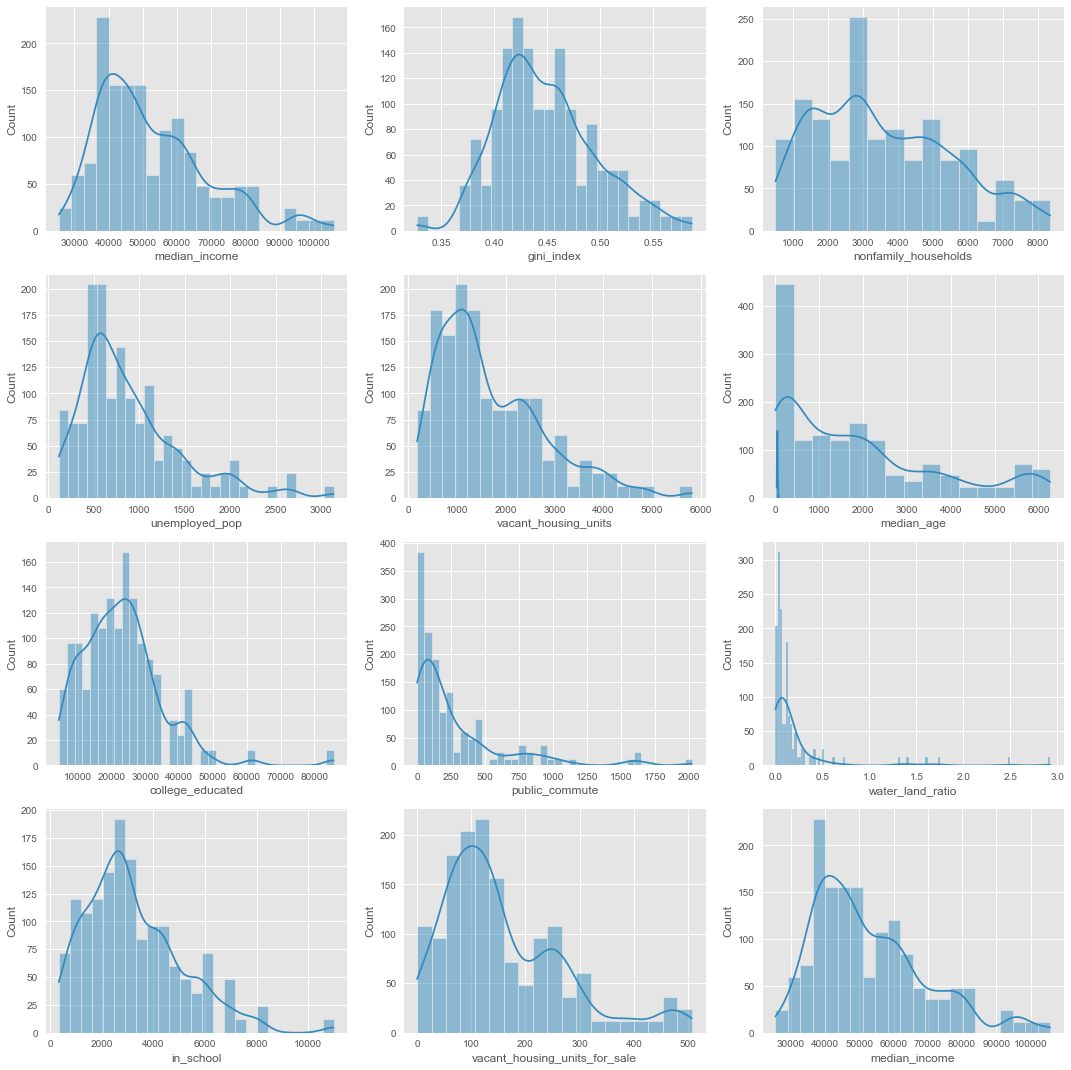

In [507]:
#see a few features
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.histplot( x= "median_income", data=features,  ax=axes[0,0], kde = True)
sns.histplot( x= "gini_index", data=features,  ax=axes[0,1], kde = True)
sns.histplot( x= "nonfamily_households", data=features, ax=axes[0,2], kde = True)
sns.histplot( x= "unemployed_pop", data=features,  ax=axes[1,0], kde = True)
sns.histplot( x= "vacant_housing_units", data=features,  ax=axes[1,1], kde = True)
sns.histplot( x= "median_age", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "large_dwellings", data=features,  ax=axes[1,2], kde = True)
sns.histplot( x= "college_educated", data=features,  ax=axes[2,0], kde = True)
sns.histplot( x= "public_commute", data=features,  ax=axes[2,1], kde = True)
sns.histplot( x= "water_land_ratio", data=features,  ax=axes[2,2], kde = True)
sns.histplot( x= "in_school", data=features,  ax=axes[3,0], kde = True)
sns.histplot( x= "vacant_housing_units_for_sale", data=features,  ax=axes[3,1], kde = True)
sns.histplot( x= "median_income", data=features,  ax=axes[3,2], kde = True)

plt.tight_layout();

### Label

In [509]:
label = df_model[(df_model['year'].isin(['2018']))][['zri']]
label.head()

,zri
11000,1409.0
11001,1293.0
11002,1263.0
11003,1048.0
11004,1433.0


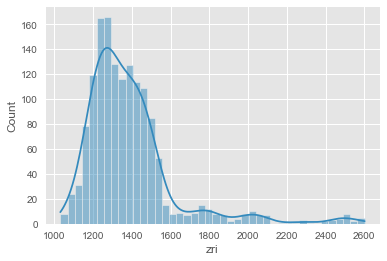

In [510]:
sns.histplot( x= "zri", data=label, kde = True);


In [511]:
label_trans = np.log(label)
label_trans.head()

,zri
11000,7.250636
11001,7.164720
11002,7.141245
11003,6.954639
11004,7.267525


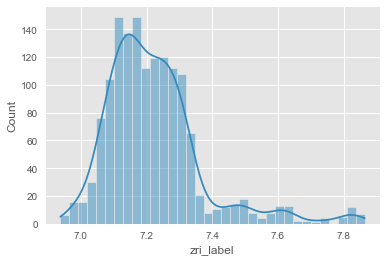

In [512]:
label_trans.rename(columns = {'zri':'zri_label'}, inplace = True)
sns.histplot( x= "zri_label", data=label_trans, kde = True);

In [513]:
label_trans.shape[0]

1500

In [514]:
features.shape[0]

1500

In [515]:
#transform zri to log scale
features['zri'] = pd.to_numeric(features['zri'], errors='coerce')
features['zri'] = np.log(features['zri'])

In [519]:
#concatenate features and label
features = features.reset_index(drop = True)
label_trans = label_trans.reset_index(drop = True)
lab_and_features = pd.concat([label_trans,features], axis = 1)
lab_and_features.head(5)

,zri_label,RegionName,zri,year,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,water_land_ratio
0,7.250636,33647,7.198184,2016,0.4592,39069.0,34.3,76755.0,15828.0,7224.0,2123.0,32713.0,13264.0,361600.0,2234.0,659.0,407.0,254.0,57560.0,85690.0,10978.0,10603.0,9140.0,22.0,8093.0,10225.0,33893.0,749.0,749.0,4048.0,975.0,3511,19158,2791,7253,9131.0,7318.0,6603.0,14702.0,12605.0,2451.0,19536.0,5750.0,342.0,6910.0,2115.0,421.0,32180.0,17619.0,37924.0,6737.0,0.044168
1,7.164720,33511,7.119636,2016,0.4016,27653.0,35.8,56077.0,13705.0,7248.0,1430.0,28233.0,10425.0,213400.0,2206.0,921.0,282.0,430.0,50264.0,61505.0,8026.0,17425.0,2370.0,198.0,9093.0,12370.0,28070.0,268.0,268.0,2287.0,1808.0,2397,14622,2923,8291,11276.0,7215.0,2462.0,14776.0,9649.0,1855.0,16551.0,6266.0,170.0,7808.0,2225.0,325.0,28316.0,13432.0,31684.0,8153.0,0.054533
2,7.141245,33578,7.096721,2016,0.4081,27870.0,33.0,58334.0,11374.0,6067.0,1724.0,24350.0,9010.0,209500.0,1299.0,468.0,91.0,230.0,44598.0,49262.0,7542.0,14727.0,1382.0,80.0,9462.0,12746.0,21354.0,111.0,111.0,2316.0,1798.0,2686,11350,2632,7682,8967.0,6448.0,2026.0,13854.0,7800.0,1485.0,13515.0,3984.0,127.0,6416.0,1470.0,418.0,24101.0,12417.0,28289.0,4816.0,0.114368
3,6.954639,34668,6.930495,2016,0.4097,18412.0,46.2,33697.0,10721.0,7452.0,1915.0,16181.0,11743.0,92100.0,4316.0,623.0,493.0,220.0,28776.0,32403.0,5293.0,22964.0,685.0,46.0,1366.0,5738.0,35933.0,21.0,21.0,1114.0,1467.0,2257,6810,2216,4898,14232.0,3517.0,424.0,9094.0,3786.0,2322.0,18631.0,1965.0,98.0,4092.0,1680.0,560.0,23504.0,9289.0,21557.0,12361.0,0.167757
4,7.267525,34698,7.201916,2016,0.4639,30273.0,53.1,45254.0,9436.0,8175.0,1157.0,16699.0,11454.0,238900.0,3720.0,240.0,319.0,360.0,29170.0,41555.0,3928.0,16968.0,831.0,258.0,1312.0,2595.0,32131.0,80.0,80.0,1115.0,680.0,2058,7928,2053,4660,11164.0,4694.0,1753.0,9599.0,4774.0,1042.0,14842.0,3967.0,148.0,4290.0,1343.0,376.0,20070.0,6477.0,16771.0,13244.0,0.503604


Drop all the rows that don't have a value for the 2018 zri label

In [520]:
missing_labels = lab_and_features[(lab_and_features['zri_label'].isna())].index
lab_and_features = lab_and_features.drop(index = missing_labels)
lab_and_features.shape[0]

1482

In [521]:
print_missingness(lab_and_features)

The number of observations is 1482
The number of variables is 52
    
The total number of missing values is 13
The number of rows with missing values is 13
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    13
dtype: int64


## Benchmark model
### Predicting zri with historical zri values

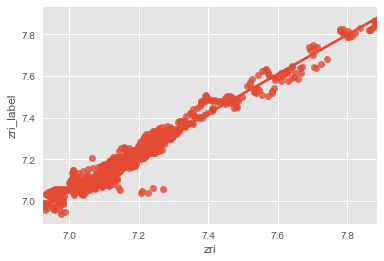

In [522]:

sns.regplot( x= "zri", y = 'zri_label', data=lab_and_features);

#### Train test split

In [523]:
from sklearn.model_selection import train_test_split

Xbase = lab_and_features[['zri']]
y = lab_and_features['zri_label']
#benchmark model

XtrainB, XtestB, ytrainB, ytestB = train_test_split(Xbase,y)

### Imputation

In [524]:
XtrainB = XtrainB.fillna(method = 'ffill')
XtestB = XtestB.fillna(method = 'ffill')

No need to do scaling since the data are on the same scale and similar distributions

### OLS

In [525]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

base_ols = LinearRegression()
base_ols.fit(XtrainB,ytrainB)

print(f'Linear regression training score: {base_ols.score(XtrainB,ytrainB)}')
print(f'Linear regression testing score: {base_ols.score(XtestB,ytestB)}')

y_pred = base_ols.predict(XtestB)
RMSE = mean_squared_error(ytestB,y_pred,squared = False)
print(f'Linear regression RMSE: {RMSE}')

Linear regression training score: 0.934423010938255
Linear regression testing score: 0.92439209549663
Linear regression RMSE: 0.038367254584379354


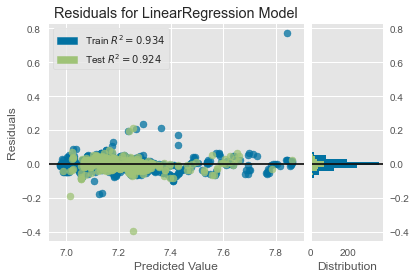

In [526]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(base_ols)
visualizer.fit(XtrainB, ytrainB) 
visualizer.score(XtestB, ytestB)  
visualizer.show() ;

In [527]:
#The final model to get the residuals will be trained in the whole data

Xbase_final = Xbase.fillna(method = 'ffill')

final_base_ols = LinearRegression()
final_base_ols.fit(Xbase_final, y)


LinearRegression()

In [528]:
predictions = final_base_ols.predict(Xbase_final) #gives an array
predictions

array([7.23125109, 7.15744299, 7.13591145, ..., 7.14056707, 7.28652088,
       7.19689576])

In [529]:
residuals = y - predictions
residuals[:5]

0    0.019384
1    0.007277
2    0.005334
3   -0.025077
4    0.032767
Name: zri_label, dtype: float64

Add residuals to the label and features dataframe

In [530]:
lab_and_features['residuals'] = residuals
lab_and_features.head(3)

,zri_label,RegionName,zri,year,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,water_land_ratio,residuals
0,7.250636,33647,7.198184,2016,0.4592,39069.0,34.3,76755.0,15828.0,7224.0,2123.0,32713.0,13264.0,361600.0,2234.0,659.0,407.0,254.0,57560.0,85690.0,10978.0,10603.0,9140.0,22.0,8093.0,10225.0,33893.0,749.0,749.0,4048.0,975.0,3511,19158,2791,7253,9131.0,7318.0,6603.0,14702.0,12605.0,2451.0,19536.0,5750.0,342.0,6910.0,2115.0,421.0,32180.0,17619.0,37924.0,6737.0,0.044168,0.019384
1,7.164720,33511,7.119636,2016,0.4016,27653.0,35.8,56077.0,13705.0,7248.0,1430.0,28233.0,10425.0,213400.0,2206.0,921.0,282.0,430.0,50264.0,61505.0,8026.0,17425.0,2370.0,198.0,9093.0,12370.0,28070.0,268.0,268.0,2287.0,1808.0,2397,14622,2923,8291,11276.0,7215.0,2462.0,14776.0,9649.0,1855.0,16551.0,6266.0,170.0,7808.0,2225.0,325.0,28316.0,13432.0,31684.0,8153.0,0.054533,0.007277
2,7.141245,33578,7.096721,2016,0.4081,27870.0,33.0,58334.0,11374.0,6067.0,1724.0,24350.0,9010.0,209500.0,1299.0,468.0,91.0,230.0,44598.0,49262.0,7542.0,14727.0,1382.0,80.0,9462.0,12746.0,21354.0,111.0,111.0,2316.0,1798.0,2686,11350,2632,7682,8967.0,6448.0,2026.0,13854.0,7800.0,1485.0,13515.0,3984.0,127.0,6416.0,1470.0,418.0,24101.0,12417.0,28289.0,4816.0,0.114368,0.005334


#### Residuals EDA

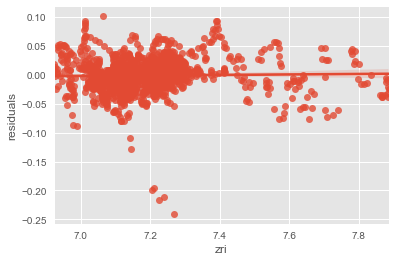

In [531]:
sns.regplot( x= "zri", y = 'residuals', data=lab_and_features);

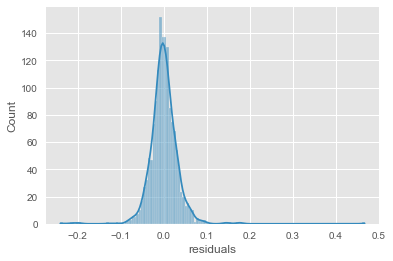

In [532]:
sns.histplot( x= "residuals", data=lab_and_features, kde = True);

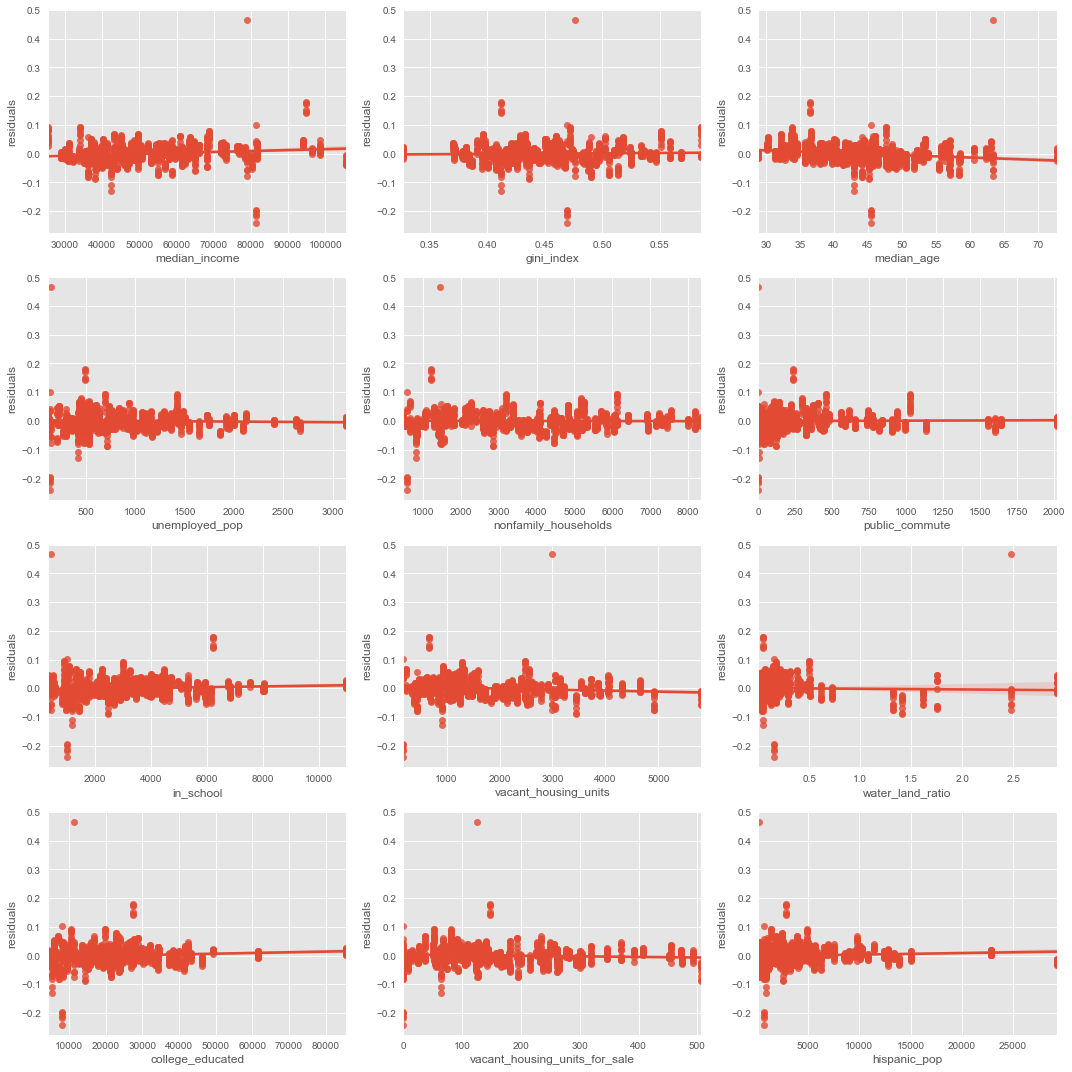

In [533]:
f, axes = plt.subplots(4, 3, figsize=(15,15))

sns.regplot( x= "median_income", y = 'residuals', data=lab_and_features,  ax=axes[0,0])
sns.regplot( x= "gini_index",y = 'residuals', data=lab_and_features,  ax=axes[0,1])
sns.regplot( x= "median_age", y = 'residuals', data=lab_and_features,  ax=axes[0,2])
sns.regplot( x= "unemployed_pop", y = 'residuals', data=lab_and_features,  ax=axes[1,0])
sns.regplot( x= "nonfamily_households", y = 'residuals',data=lab_and_features,  ax=axes[1,1])
sns.regplot( x= "public_commute", y = 'residuals',data=lab_and_features,  ax=axes[1,2])
sns.regplot( x= "in_school", y = 'residuals',data=lab_and_features,  ax=axes[2,0])
sns.regplot( x= "vacant_housing_units", y = 'residuals',data=lab_and_features,  ax=axes[2,1])
sns.regplot( x= "water_land_ratio", y = 'residuals',data=lab_and_features,  ax=axes[2,2])
sns.regplot( x= "college_educated", y = 'residuals',data=lab_and_features,  ax=axes[3,0])
sns.regplot( x= "vacant_housing_units_for_sale", y = 'residuals',data=lab_and_features,  ax=axes[3,1])
sns.regplot( x= "hispanic_pop", y = 'residuals',data=lab_and_features,  ax=axes[3,2])

plt.tight_layout();

The residuals don't have an obvious linear relationship with any of the predictors. So I'll try tree-based models

### Modeling the residuals

In [534]:
from sklearn.model_selection import  GridSearchCV, KFold

In [535]:
print_missingness(lab_and_features)

The number of observations is 1482
The number of variables is 53
    
The total number of missing values is 13
The number of rows with missing values is 13
---   ---   ---   ---   ---   ---   ---   ---   ---
zri    13
dtype: int64


In [536]:
lab_and_features.dropna(inplace = True)

In [553]:
Xrfr = lab_and_features.drop(columns =  ['residuals','zri',
                                        'zri_label', 'year',
                                        'RegionName'])
Yrfr = lab_and_features['residuals'] 
print(Xrfr.shape)
print(len(Yrfr))

(1469, 48)
1469


In [554]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xrfr,Yrfr)

In [555]:
Xtrain.sample(5)

,gini_index,income_per_capita,median_age,median_income,family_households,nonfamily_households,unemployed_pop,employed_pop,owner_occupied_housing_units,owner_occupied_housing_units_upper_value_quartile,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,public_commute,personal_commute,college_educated,in_school,high_school_educated,asian_pop,amerindian_pop,black_pop,hispanic_pop,white_pop,other_race_pop,two_or_more_races_pop,two_parent_hh,one_parent_hh,employed_creative,employed_prof,employed_skill,employed_service,income_less_than_60000,income_less_than_125000,income_over_125000,commute_less_than_30,commute_less_than_60,commute_over_60,small_dwellings,large_dwellings,rent_under10,rent_tento50,rent_over50,rent_uncomputed,females,age_under_18,age_18to60,age_over_60,water_land_ratio
911,0.3819,26746.0,39.5,61364.0,9362.0,2986.0,1136.0,16539.0,9821.0,225400.0,993.0,191.0,145.0,102.0,30364.0,34512.0,6740.0,13304.0,1467.0,178.0,3569.0,7276.0,21831.0,193.0,193.0,1346.0,719.0,1490,7946,1991,5112,5952.0,4520.0,1876.0,7461.0,6486.0,1542.0,11128.0,288.0,67.0,1674.0,618.0,168.0,17256.0,9603.0,18534.0,6350.0,0.041783
1218,0.4213,29901.0,39.3,56835.0,4341.0,2405.0,474.0,9084.0,4015.0,224600.0,603.0,140.0,67.0,90.0,16218.0,18876.0,2691.0,6471.0,680.0,40.0,1145.0,5134.0,9820.0,63.0,63.0,675.0,247.0,988,4455,850,2791,3540.0,2295.0,911.0,4117.0,3668.0,569.0,4089.0,1387.0,178.0,2110.0,335.0,108.0,9365.0,4139.0,9701.0,2974.0,0.090295
395,0.5684,21031.0,28.9,28975.0,6218.0,7302.0,1743.0,15944.0,4074.0,227600.0,2654.0,1214.0,55.0,1642.0,26376.0,29101.0,4008.0,10140.0,1702.0,63.0,6678.0,10869.0,13323.0,145.0,145.0,1032.0,1130.0,2517,7426,2083,3918,10741.0,1954.0,825.0,8424.0,5396.0,1496.0,9129.0,5718.0,252.0,5220.0,3164.0,810.0,17569.0,7617.0,20698.0,4634.0,0.125624
600,0.5339,34388.0,34.2,50378.0,3349.0,2923.0,756.0,7445.0,2669.0,212100.0,761.0,301.0,0.0,326.0,13354.0,14379.0,2261.0,5941.0,674.0,30.0,2790.0,2375.0,8453.0,28.0,28.0,530.0,511.0,726,3155,911,2653,3665.0,1807.0,800.0,5443.0,1697.0,323.0,4982.0,2028.0,178.0,2372.0,923.0,130.0,7583.0,3739.0,9532.0,1496.0,0.214647
1061,0.5062,44860.0,58.4,54935.0,4201.0,4457.0,480.0,6992.0,6088.0,433700.0,4909.0,372.0,196.0,78.0,11654.0,21468.0,955.0,6990.0,268.0,28.0,65.0,888.0,14771.0,0.0,0.0,220.0,174.0,973,3130,881,2008,4651.0,2674.0,1333.0,3632.0,2074.0,431.0,7082.0,5882.0,66.0,1680.0,627.0,197.0,8207.0,1518.0,7229.0,6596.0,1.325685


### Random Forest model

In [556]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
print(f'RF regression training score: {rfr.score(Xtrain, ytrain)}')
print(f'RF regression testing score: {rfr.score(Xtest, ytest)}')

RF regression training score: 0.6703968824883699
RF regression testing score: 0.6414435173564981


Perform a grid search to improve the model

In [578]:
#parameters grid
params = {'ccp_alpha':[0,0.0001], #lets decrease the size of each tree
         'n_estimators': [ 300, 400,500Perform a grid search to improve the model],
         'min_samples_leaf':[3,4, 5],
         'max_features':[0.2, 0.25, 0.3]}
cv = KFold(n_splits = 5, shuffle= True)

grid = GridSearchCV(estimator = rfr,
                   param_grid = params,
                   cv = cv,
                   return_train_score = True)

grid.fit(Xtrain, np.ravel(ytrain))

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 0.0001],
                         'max_features': [0.2, 0.25, 0.3],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [300, 400, 500]},
             return_train_score=True)

In [576]:
grid.best_params_

{'ccp_alpha': 0,
 'max_features': 0.25,
 'min_samples_leaf': 4,
 'n_estimators': 400}

In [577]:
best_rf = grid.best_estimator_
print(f'RF best regression training score: {best_rf.score(Xtrain, ytrain)}')
print(f'RF best regression testing score: {best_rf.score(Xtest, ytest)}')

RF best regression training score: 0.6632489998377724
RF best regression testing score: 0.5555775078093599


In [580]:
feat_imp = pd.Series(rfr.feature_importances_, index = Xtrain.columns)
feat_imp = feat_imp.sort_values(ascending = False)
feat_imp.head(15)

median_age                       0.160551
income_per_capita                0.091176
vacant_housing_units             0.071896
age_over_60                      0.050357
employed_skill                   0.041210
employed_service                 0.040536
water_land_ratio                 0.039857
median_income                    0.026811
rent_uncomputed                  0.026046
vacant_housing_units_for_sale    0.025118
income_over_125000               0.023642
black_pop                        0.021737
income_less_than_125000          0.019296
employed_creative                0.018977
commute_over_60                  0.018454
dtype: float64

### Gradient Boosting model

In [557]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, np.ravel(ytrain))

GradientBoostingRegressor()

In [558]:
print(gbr.score(Xtrain,ytrain))
print(gbr.score(Xtest,ytest))

y_pred = gbr.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'Gradient Boosting RMSE: {RMSE}')

0.6658490773141341
0.6257855072422123
Gradient Boosting RMSE: 0.021729367802125175


Perform a grid search to improve the model

In [572]:
paramsGB = {'learning_rate':[0.5, 0.8,1], #lets decrease the size of each tree
            'n_estimators': [40,60,80],
            'max_depth':[3, 4],
            'subsample':[ 0.8, 0.9]}
gridGB = GridSearchCV(estimator = gbr,
                       param_grid = paramsGB,
                       cv = cv,
                       return_train_score = True)

gridGB.fit(Xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.5, 0.8, 1], 'max_depth': [3, 4],
                         'n_estimators': [40, 60, 80],
                         'subsample': [0.8, 0.9]},
             return_train_score=True)

In [573]:
gridGB.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 60, 'subsample': 0.8}

In [574]:
best_gb = gridGB.best_estimator_
print(f'GB best regression training score: {best_gb.score(Xtrain, ytrain)}')
print(f'GB best regression testing score: {best_gb.score(Xtest, ytest)}')

GB best regression training score: 0.666546439010407
GB best regression testing score: 0.6389285220840224


### Display feature importances from the best model

In [566]:
feat_impGB = pd.Series(gbr.feature_importances_, index = Xtrain.columns)
feat_impGB.sort_values(ascending = False).head(15)

median_age                       0.172019
income_per_capita                0.100196
water_land_ratio                 0.068180
employed_service                 0.051708
vacant_housing_units             0.046957
vacant_housing_units_for_sale    0.040694
age_over_60                      0.039533
income_less_than_125000          0.035589
small_dwellings                  0.032327
black_pop                        0.032308
rent_uncomputed                  0.032245
rent_over50                      0.029986
employed_skill                   0.024111
employed_creative                0.023319
income_over_125000               0.018664
dtype: float64